In [ ]:
# other classes
# cartoon like images

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
     ])

batch_size = 200

trainset = torchvision.datasets.SVHN(root='../data/SVHN', split="train",
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

Using downloaded and verified file: ../data/SVHN\train_32x32.mat


In [23]:
# save 100 out of distribution data
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
training_data = torch.Tensor().to(device)
training_labels = torch.Tensor().to(device)
for data, target in trainloader:
    training_data = torch.cat((training_data, data), 0)
    training_labels = torch.cat((training_labels, target), 0)
    break

In [24]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
OOD_path = os.path.join(content_path, "OOD")
if not os.path.exists(OOD_path):
    os.mkdir(OOD_path)
SVHN_path = os.path.join(OOD_path, "SVHN")
if not os.path.exists(SVHN_path):
    os.mkdir(SVHN_path)
training_data_path = os.path.join(SVHN_path, "data.pth")
training_labels_path = os.path.join(SVHN_path, "label.pth")
torch.save(training_data, training_data_path)
torch.save(training_labels, training_labels_path)

100%|██████████| 1/1 [00:00<00:00, 30.38it/s]

Finish loading content!


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B539E8160>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B1F81A898>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B1FC98EB8>


100%|██████████| 50/50 [00:00<00:00, 5553.16it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B21135358>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B4D740B70>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B55C40CC0>


100%|██████████| 50/50 [00:00<00:00, 5570.12it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B59744550>


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B55C40358>


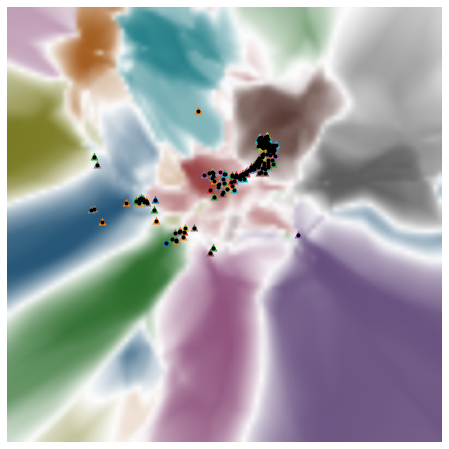

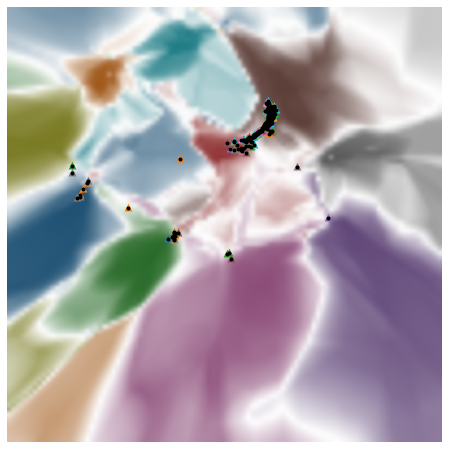

In [27]:
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import numpy as np

content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 10, 200, 10, 512, 10, classes, cmap="tab10", resolution=100, neurons=256, verbose=1, temporal=False, split=-1, advance_border_gen=True, alpha=0.8, attack_device="cuda:0")

repr = mms.get_representation_data(180, training_data)

img_save_location = os.path.join(mms.content_path, "img")

for i in range(160, 200, 20):
    test_data = mms.get_epoch_test_repr_data(i)
    test_labels = mms.get_epoch_test_labels()
    mms.customize_visualize(i, repr, training_labels.cpu().numpy(), test_data, test_labels.cpu().numpy(),
                            os.path.join(img_save_location, "alb_{:d}".format(i)), np.arange(-200, 0, 1))

In [2]:
# quickdraw
import os
from PIL import Image
import numpy as np
import random

classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

folder = "E:\\DVI_exp_data\\quickdraw\\quickdraw"

imgs = []
labels = []
for cls in classes:
    if cls in os.listdir(folder):
        # add labels
        idx = classes.index(cls)
        labels.extend([idx]*100)

        # add images
        cls_folder = os.path.join(folder, cls)
        seleted_images = os.listdir(cls_folder)
        test_samples = np.random.choice(seleted_images, 100, replace=False).tolist()
        for img in test_samples:
            img = os.path.join(cls_folder,img)
            img = Image.open(img)
            img = img.resize((32,32), Image.ANTIALIAS)
            imgs.append(img)

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
     ])


In [4]:
device = torch.device("cpu")
training_data = torch.Tensor().to(device)
training_labels = torch.IntTensor(labels).to(device)
for img in imgs:
    data = transform(img)
    data = torch.unsqueeze(data, 0)
    training_data = torch.cat((training_data, data), 0)

In [16]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
OOD_path = os.path.join(content_path, "OOD")
if not os.path.exists(OOD_path):
    os.mkdir(OOD_path)
SVHN_path = os.path.join(OOD_path, "quickdraw")
if not os.path.exists(SVHN_path):
    os.mkdir(SVHN_path)
training_data_path = os.path.join(SVHN_path, "data.pth")
training_labels_path = os.path.join(SVHN_path, "label.pth")
torch.save(training_data, training_data_path)
torch.save(training_labels, training_labels_path)

Finish loading content!


100%|██████████| 4/4 [00:01<00:00,  3.65it/s]
E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F55846CCF8>
Instructions for updating:
Use tf.identity instead.
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F558526F60>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F5585AA278>


100%|██████████| 50/50 [00:00<00:00, 214.27it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F55846C898>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F505795A20>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F508319FD0>


100%|██████████| 50/50 [00:00<00:00, 5555.08it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F513C923C8>


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001F5082E2CC0>


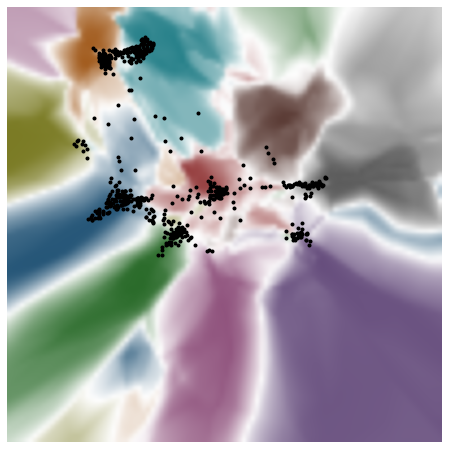

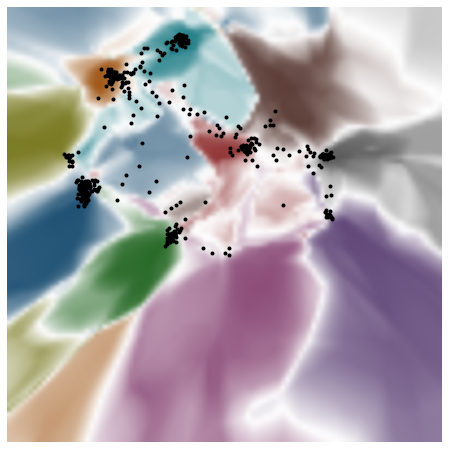

In [5]:
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import numpy as np

content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 10, 200, 10, 512, 10, classes, cmap="tab10", resolution=100, neurons=256, verbose=1, temporal=False, split=-1, advance_border_gen=True, alpha=0.8, attack_device="cuda:0")

repr = mms.get_representation_data(180, training_data)

img_save_location = os.path.join(mms.content_path, "img")

for i in range(160, 200, 20):
    test_data = mms.get_epoch_test_repr_data(i)
    test_labels = mms.get_epoch_test_labels()
    mms.customize_visualize(i, repr, training_labels.cpu().numpy(), test_data, test_labels,
                            os.path.join(img_save_location, "OOD_alb_{:d}".format(i)), np.arange(-800, 0, 1))

Finish loading content!


E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:971: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F8961D940>
Instructions for updating:
Use tf.identity instead.
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F89773A20>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F8993D1D0>


100%|██████████| 50/50 [00:00<00:00, 202.15it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F89AD73C8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F0079A9B0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F0116DAC8>


100%|██████████| 50/50 [00:00<00:00, 3864.72it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F05F106D8>


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024F00794BE0>


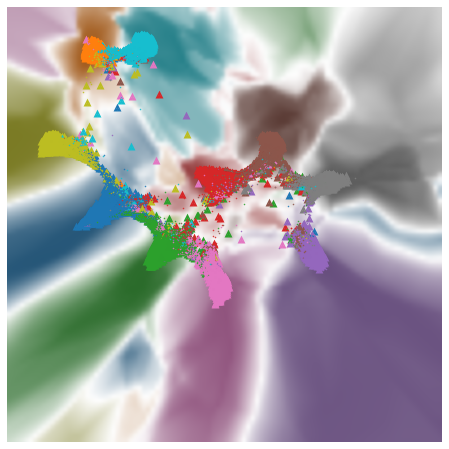

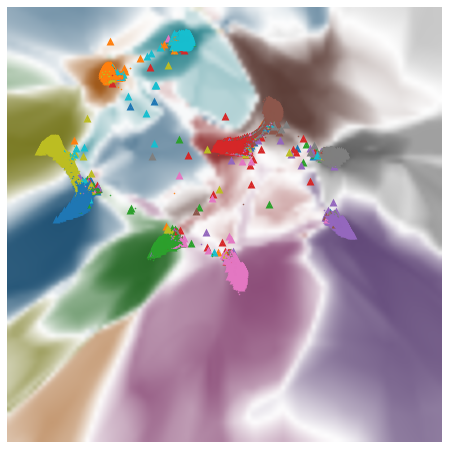

In [2]:
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import numpy as np
import os

content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 10, 200, 10, 512, 10, classes, cmap="tab10", resolution=100, neurons=256, verbose=1, temporal=False, split=-1, advance_border_gen=True, alpha=0.8, attack_device="cuda:0")



img_save_location = os.path.join(mms.content_path, "img")

for i in range(160, 200, 20):
    repr = mms.get_epoch_train_repr_data(i)
    training_labels = mms.get_epoch_train_labels(i)
    test_data = mms.get_epoch_test_repr_data(i)
    test_labels = mms.get_epoch_test_labels()
    mms.customize_visualize(i, repr, training_labels, test_data, test_labels,
                            os.path.join(img_save_location, "alb_{:d}".format(i)), np.arange(-800, 0, 1))